<a href="https://colab.research.google.com/github/NehaKumari500092077/Visual-Computing/blob/main/Assignment1_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Color Space Conversion (3 Marks)
Convert an image from YUV to YCbCr color space using the provided conversion matrices. Implement the conversion without using OpenCV library functions. Verify the result using OpenCV. Use a_1_task_1.png as input.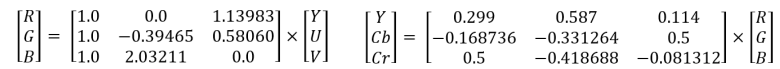

YCbCr Image manual


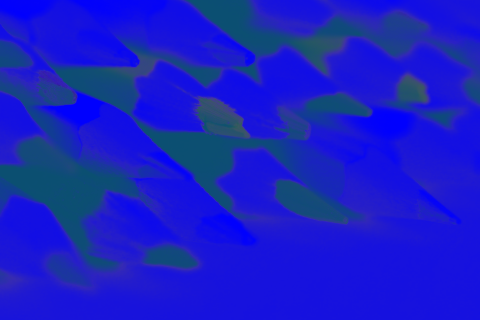

YCbCr Image opencv


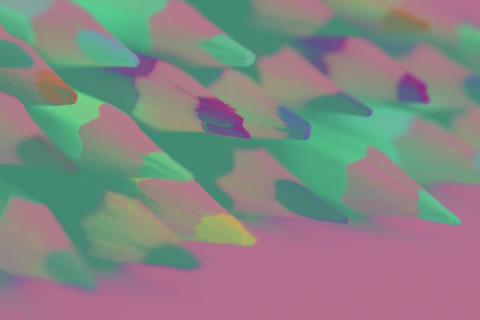

Image created by Conversion Matrix and Opencv is not equal with MSE as :: 105.06613715277778


In [26]:
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Method to verify if two images are equal or not
def calculate_mse(img1, img2):
  return np.mean((np.array(img1) - np.array(img2)) ** 2)

# YUV to RGB conversion
def convert_yuv_to_rgb(input_img):
  yuv_to_rgb_matrix = np.array([[1.0, 0.0, 1.13983],
                                [1.0, -0.39465, 0.58060],
                                [1.0, 2.03211, 0.0]
                                ])

  # convert input image to numpy array
  input_img_array = np.array(input_img)

  # normalize it in the range of [0, 1]
  input_img_array = input_img_array / 255.0

  # reshape and transpose input image array
  input_img_array = input_img_array.reshape(-1, 3).T

  # matrix transformation ( dot product of yuv_to_rgb_matrix and input image matrix)
  rgb_img = np.dot(yuv_to_rgb_matrix, input_img_array)

  # clip values [0, 255] and reshaping into image format
  rgb_img = np.clip(rgb_img * 255.0, 0, 255)

  # converts data type of RGB image to unit8(unsigned 8 bit integer) and transpose
  rgb_img = rgb_img.astype(np.uint8).T

  # reshape the RGB image to original shape
  rgb_img = rgb_img.reshape(input_img.size[1], input_img.size[0], 3)

  # Convert numpy array to Image and return
  return Image.fromarray(rgb_img)


# RGB to YCbCr conversion
def convert_rgb_to_ycbcr(rgb_img):
  rgb_to_ycbcr_matrix = np.array([[0.299, 0.587, 0.114],
                                [-0.168736, -0.331264, 0.5],
                                [0.5, -0.418688, -0.081312]])

  # convert rgb image into numpy array
  rgb_img_array = np.array(rgb_img)

  # normalize it in the range [0, 1]
  rgb_img_array = rgb_img_array / 255.0

  # reshape and transpose it
  rgb_img_array = rgb_img_array.reshape(-1, 3).T

  # matrix transformation ( dot product of yuv_to_rgb_matrix and input image matrix)
  ycbcr_img = np.dot(rgb_to_ycbcr_matrix, rgb_img_array)

  # clip values [0, 255], and reshaping into image format
  ycbcr_img = np.clip(ycbcr_img * 255.0, 0, 255)

  # converts data type of RGB image to unit8(unsigned 8 bit integer) and transpose
  ycbcr_img = ycbcr_img.astype(np.uint8).T

  # reshape the RGB image to original shape
  ycbcr_img = ycbcr_img.reshape(rgb_img.size[1], rgb_img.size[0], 3)

  # return numpy array of converted ycbcr image
  return ycbcr_img


# open input image
input_img = Image.open("/content/a_1_task_1.png")

#convert input image (YUV) to RGB
rgb_img = convert_yuv_to_rgb(input_img)

#convert RGB image to YCbCr
ycbcr_img_manual = convert_rgb_to_ycbcr(rgb_img)

# show manually converted ycbcr image
print("YCbCr Image manual")
cv2_imshow(ycbcr_img_manual)

# ========= Conversion of YUV to YCBCR using OPENCV =============
# read input image
yuv_image_opencv = cv2.imread("/content/a_1_task_1.png")

# Convert BGR to YCbCr as opencv read image as BGR
ycbcr_image_opencv = cv2.cvtColor(yuv_image_opencv, cv2.COLOR_BGR2YCrCb)

# show converted ycbcr image using opencv
print("YCbCr Image opencv")
cv2_imshow(ycbcr_image_opencv)

# Verify the Ycbcr image which is created using conversion matrix vs opencv

#verify using mean square error
mse_result = calculate_mse(ycbcr_img_manual, ycbcr_image_opencv)
if(mse_result < 1):
  print(f"Image created by Conversion Matrix and Opencv is equal with MSE as :: {mse_result}")
else:
  print(f"Image created by Conversion Matrix and Opencv is not equal with MSE as :: {mse_result}")
